In [1]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
import aplpy
import AG_fft_tools as fft_tools
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel 
from astropy.modeling.models import Gaussian2D
import aplpy
import pyparsing
import pyregion
import matplotlib.pyplot as pyplot
import matplotlib as mpl
import os
import numpy as np
import matplotlib.text as text
%matplotlib inline

/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


A lot of negative values appear aroud the dense part of combined image.
Incorrect resolution of the image used in the combination may lead to these negative values.
Check the PSD of LR deconvolved image and find LR deconvolved image have the same PSD with the model image used in the LR deconvolution.
The LR deconvolved image's resolution is 37 arcsecond.

In [2]:
#import original model map, deconvolution model map and the LR deconvolved image.
model_file='/Users/shjiao/desktop/Oph_COS/sm.scale.regird.fits'
hdu_mod=fits.open(model_file)
data_mod = hdu_mod[0].data

he_file='/Users/shjiao/desktop/Oph_COS/herschel.fits'
hdu_he=fits.open(he_file)
data_he = hdu_he[0].data

lr_file='/Users/shjiao/desktop/Oph_COS/lr_deconv.fits'
hdu_lr=fits.open(lr_file)
data_lr = hdu_lr[0].data

#caculate the PSD
frequency_mod,zz_mod = fft_tools.PSD2(data_mod,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_he,zz_he = fft_tools.PSD2(data_he,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_lr,zz3_lr = fft_tools.PSD2(data_lr,fft_pad=True,oned=True,view=False,wavnum_scale=False)

/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/AG_image_tools/radialprofile.py:74: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image*weights*mask))[0] / np.histogram(r, bins, weights=(mask*weights))[0]


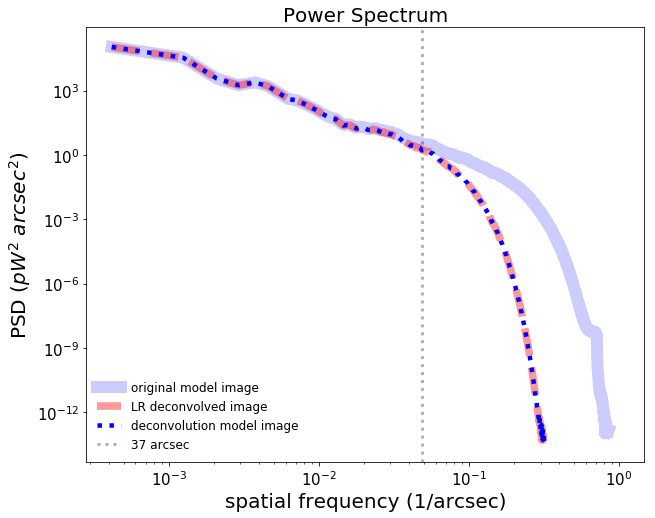

In [43]:
#plot PSD 
plt.figure(figsize=(10, 8))
plt.plot((frequency_mod),(zz_mod),linewidth=12.,color = (0, 0, 1.0, 0.2),label='original model image')
plt.plot((frequency_lr),(zz3_lr),linewidth=7.5,color=(1.0, 0, 0, 0.4),label='LR deconvolved image',linestyle='dashed')
plt.plot((frequency_he),(zz_he),linewidth=4.5,color='blue',label='deconvolution model image',linestyle='dotted')

#add beam/filtering info
beam_smo_freq = 1./(37./1.8)
plt.axvline(x=beam_smo_freq,linestyle=':',color='black',alpha=0.3,label='37 arcsec',linewidth=3.)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('spatial frequency (1/arcsec)',size=20)
plt.ylabel('PSD ($pW^{2}$ $arcsec^{2}$)',size=20)
plt.title('Power Spectrum',size=20)
legend = plt.legend(loc='lower left', shadow=True, fontsize='large',frameon=False)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)

#plt.ylim((10**-1))

Find that these negative values appear because the flux scale of two images used in the combination doesn't match.
After scale the flux, Miriad combination works well.

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.163e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.592e-03 [aplpy.core]
INFO: Auto-setting vmin to -1.192e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.878e-03 [aplpy.core]


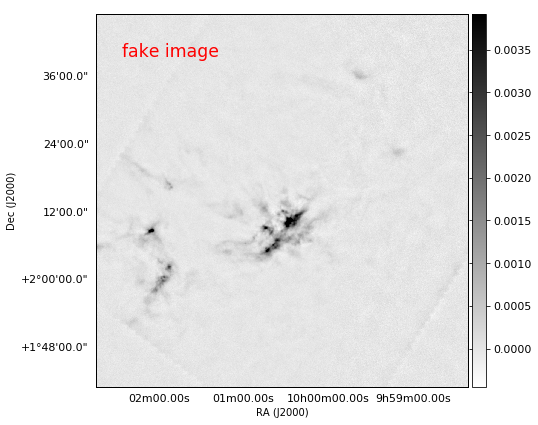

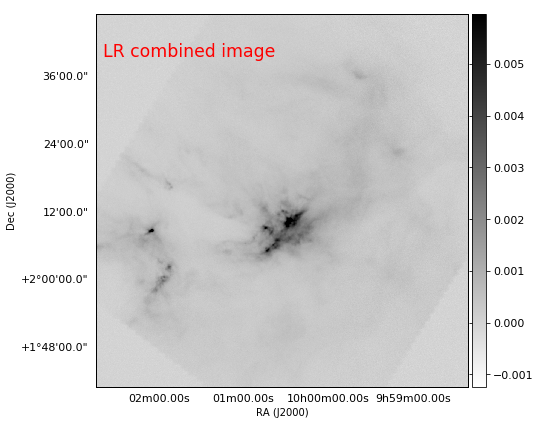

In [30]:
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)

f_fake = aplpy.FITSFigure('/Users/shjiao/desktop/blank850_fake_COS.fits', figsize=(7,7))
f_fake.add_label(0.2,0.9, 'fake image', color='red', relative=True, size='xx-large',layer='source')
f_fake.show_grayscale()
f_fake.add_colorbar()
f_fake.colorbar.show()
f_fake.show_colorscale(cmap='gist_yarg',vmin=-0.000447503,vmax=0.0039158)
f_fake.recenter(150.136162,2.2315983,width=1.1,height=1.1)

f_model = aplpy.FITSFigure('/Users/shjiao/desktop/Oph_COS/combined_lr.fits', figsize=(7,7))
f_model.add_label(0.25,0.9, 'LR combined image', color='red', relative=True, size='xx-large',layer='source')
f_model.show_grayscale()
f_model.add_colorbar()
f_model.colorbar.show()
f_model.show_colorscale(cmap='gist_yarg',vmin=-0.00123983,vmax=0.00596242)
f_model.recenter(150.136162,2.2315983,width=1.1,height=1.1)

In [32]:
#import fake SCUBA2 map, and the combined image.
sc2_file='/Users/shjiao/desktop/Oph_COS/fake.fits'
hdu_sc2=fits.open(sc2_file)
data_sc2 = hdu_sc2[0].data

com_file='/Users/shjiao/desktop/Oph_COS/combined_lr.fits'
hdu_com=fits.open(com_file)
data_com = hdu_com[0].data

#caculate the PSD
frequency_sc2,zz_sc2 = fft_tools.PSD2(data_sc2,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_com,zz_com = fft_tools.PSD2(data_com,fft_pad=True,oned=True,view=False,wavnum_scale=False)

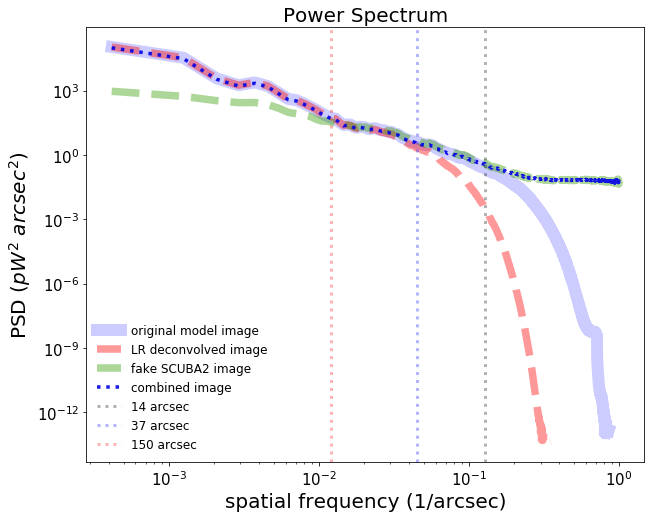

In [50]:
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)

plt.figure(figsize=(10, 8))
plt.plot((frequency_mod),(zz_mod),linewidth=12.,color = (0, 0, 1.0, 0.2),label='original model image')
plt.plot((frequency_lr),(zz3_lr),linewidth=7.5,color=(1.0, 0, 0, 0.4),label='LR deconvolved image',linestyle='dashed')
plt.plot((frequency_sc2),(zz_sc2),linewidth=7.5,color=(0.2, 0.6, 0, 0.4),label='fake SCUBA2 image',linestyle='dashed')
plt.plot((frequency_com),(zz_com),linewidth=3.5,color=(0, 0, 0.9, 0.9),label='combined image',linestyle='dotted')

#add beam/filtering info
beam_smo_freq = 1./(14./1.8)
plt.axvline(x=beam_smo_freq,linestyle=':',color='black',alpha=0.3,label='14 arcsec',linewidth=3.)
beam_smo_freq = 1./(40./1.8)
plt.axvline(x=beam_smo_freq,linestyle=':',color='blue',alpha=0.3,label='37 arcsec',linewidth=3.)
beam_3min_freq = 1./(150./1.8)
plt.axvline(x=beam_3min_freq,linestyle=':',color='red',alpha=0.3,label='150 arcsec',linewidth=3.)


plt.xscale('log')
plt.yscale('log')
plt.xlabel('spatial frequency (1/arcsec)',size=20)
plt.ylabel('PSD ($pW^{2}$ $arcsec^{2}$)',size=20)
plt.title('Power Spectrum',size=20)
legend = plt.legend(loc='lower left', shadow=True, fontsize='large',frameon=False)